In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 1. Load Dataset (Step 2)
iris = load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names

In [4]:
# 2. Train-test split (80% training, 20% testing) (Step 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [5]:
# 3. Feature Scaling (important for distance-based models) (Step 4)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# --- Find Optimal K ---
K_range = range(1, 11)
accuracy_results = {}

for K in K_range:
    # Instantiate and train KNN
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store result
    accuracy_results[K] = accuracy
    print(f"K={K}, Accuracy={accuracy:.2f}")

# Find the best K
best_K = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_K]

print(f"\nBest K={best_K} (Accuracy={best_accuracy*100:.2f}%)")

K=1, Accuracy=0.97
K=2, Accuracy=0.93
K=3, Accuracy=0.93
K=4, Accuracy=0.93
K=5, Accuracy=0.93
K=6, Accuracy=0.93
K=7, Accuracy=0.97
K=8, Accuracy=0.93
K=9, Accuracy=0.97
K=10, Accuracy=0.97

Best K=1 (Accuracy=96.67%)


In [9]:
# --- Final Model Evaluation ---
# Train the final KNN with the best K
best_knn = KNeighborsClassifier(n_neighbors=best_K)
best_knn.fit(X_train_scaled, y_train)

# Predict on the test set using the best model
y_pred_best = best_knn.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred_best, target_names=iris.target_names)
print("\nClassification Report:\n", cr)


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



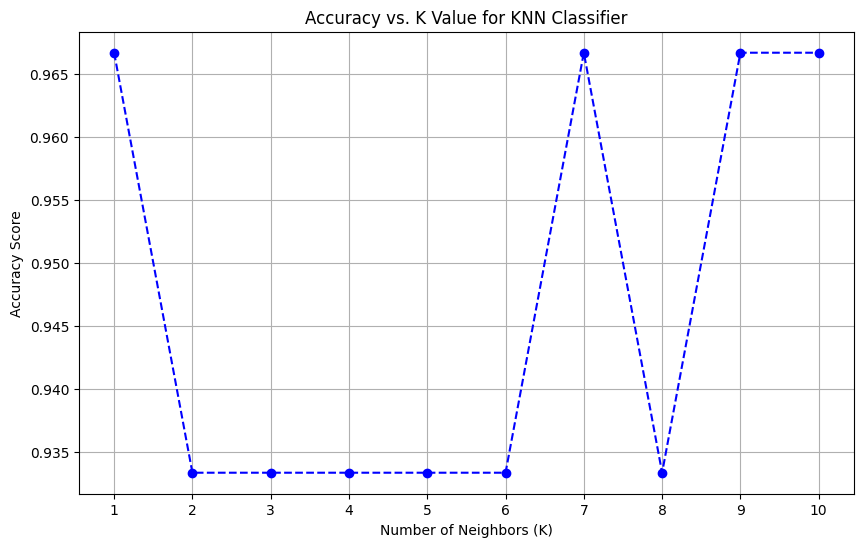

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K_range, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. K Value for KNN Classifier')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.xticks(K_range)
plt.grid(True)
plt.show()